## Dependency Parsing with Stanford NLP

Download an install Graphviz: http://www.graphviz.org/download/

In [1]:
import os
import sys
#os.path.dirname(sys.executable)

#!pip install graphviz --upgrade
#!conda install python-graphviz

In [2]:
print(sys.version)

3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


## Leveraging Stanford NLP

### Installing and configuring Stanford NLP
https://blog.manash.me/configuring-stanford-parser-and-stanford-ner-tagger-with-nltk-in-python-on-windows-f685483c374a

In [3]:
from graphviz import Source

java_path = "C:\ProgramData\Oracle\Java\javapath\java.exe"
os.environ['JAVAHOME'] = java_path

# Change the path according to your system
stanford_classifier = 'C:\StanfordNLP\stanford-ner-2017-06-09\classifiers\english.all.3class.distsim.crf.ser.gz'
stanford_ner_path = 'C:\StanfordNLP\stanford-ner-2017-06-09\stanford-ner.jar'

stanford_parser_path = 'C:\StanfordNLP\stanford-parser-full-2017-06-09\stanford-parser.jar'
stanford_parser_models_path = 'C:\StanfordNLP\stanford-parser-full-2017-06-09\stanford-parser-3.8.0-models.jar'

from nltk.parse.stanford import StanfordDependencyParser
from nltk.tag.stanford import StanfordNERTagger
#from nltk.parse.corenlp import CoreNLPParser

# Creating Tagger Object
st = StanfordNERTagger(stanford_classifier, stanford_ner_path, encoding='utf-8')
sdp = StanfordDependencyParser(path_to_jar=stanford_parser_path, path_to_models_jar=stanford_parser_models_path)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPDependencyParser instead.


In [4]:
text = 'I shot an elephant in my pajamas'
%time result = sdp.raw_parse(text)
dep = next(result)
list(dep.triples())

Wall time: 1.84 s


[(('shot', 'VBD'), 'nsubj', ('I', 'PRP')),
 (('shot', 'VBD'), 'dobj', ('elephant', 'NN')),
 (('elephant', 'NN'), 'det', ('an', 'DT')),
 (('shot', 'VBD'), 'nmod', ('pajamas', 'NNS')),
 (('pajamas', 'NNS'), 'case', ('in', 'IN')),
 (('pajamas', 'NNS'), 'nmod:poss', ('my', 'PRP$'))]

In [5]:
for triple in dep.triples():
    print (triple[1],"(",triple[0][0],", ",triple[2][0],")")

nsubj ( shot ,  I )
dobj ( shot ,  elephant )
det ( elephant ,  an )
nmod ( shot ,  pajamas )
case ( pajamas ,  in )
nmod:poss ( pajamas ,  my )


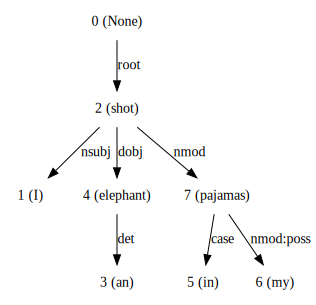

In [6]:
result = list(sdp.raw_parse(text))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
Source(dep_tree_dot_repr)

In [7]:
text = 'The brown fox is quick and he is jumping over the lazy dog'
result = sdp.raw_parse(text)
dep = next(result)
list(dep.triples())

[(('quick', 'JJ'), 'nsubj', ('fox', 'NN')),
 (('fox', 'NN'), 'det', ('The', 'DT')),
 (('fox', 'NN'), 'amod', ('brown', 'JJ')),
 (('quick', 'JJ'), 'cop', ('is', 'VBZ')),
 (('quick', 'JJ'), 'cc', ('and', 'CC')),
 (('quick', 'JJ'), 'conj', ('jumping', 'VBG')),
 (('jumping', 'VBG'), 'nsubj', ('he', 'PRP')),
 (('jumping', 'VBG'), 'aux', ('is', 'VBZ')),
 (('jumping', 'VBG'), 'nmod', ('dog', 'NN')),
 (('dog', 'NN'), 'case', ('over', 'IN')),
 (('dog', 'NN'), 'det', ('the', 'DT')),
 (('dog', 'NN'), 'amod', ('lazy', 'JJ'))]

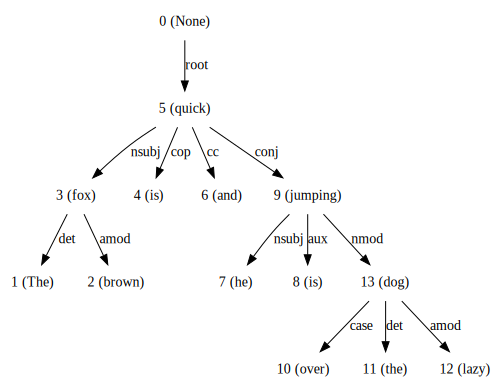

In [8]:
result = list(sdp.raw_parse(text))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
Source(dep_tree_dot_repr)

In [9]:
text = "Surging Chinese demand and an improving U.S. economy have lifted sales of Caterpillar's \
signature yellow mining and construction machines."
%time result = sdp.raw_parse(text)
dep = next(result)
list(dep.triples())

Wall time: 2.47 s


[(('Surging', 'VBG'), 'dobj', ('demand', 'NN')),
 (('demand', 'NN'), 'amod', ('Chinese', 'JJ')),
 (('Surging', 'VBG'), 'cc', ('and', 'CC')),
 (('Surging', 'VBG'), 'conj', ('lifted', 'VBN')),
 (('lifted', 'VBN'), 'nsubj', ('economy', 'NN')),
 (('economy', 'NN'), 'det', ('an', 'DT')),
 (('economy', 'NN'), 'amod', ('improving', 'VBG')),
 (('economy', 'NN'), 'compound', ('U.S.', 'NNP')),
 (('lifted', 'VBN'), 'aux', ('have', 'VBP')),
 (('lifted', 'VBN'), 'dobj', ('sales', 'NNS')),
 (('sales', 'NNS'), 'nmod', ('machines', 'NNS')),
 (('machines', 'NNS'), 'case', ('of', 'IN')),
 (('machines', 'NNS'), 'nmod:poss', ('Caterpillar', 'NNP')),
 (('Caterpillar', 'NNP'), 'case', ("'s", 'POS')),
 (('machines', 'NNS'), 'amod', ('signature', 'JJ')),
 (('machines', 'NNS'), 'amod', ('yellow', 'JJ')),
 (('machines', 'NNS'), 'compound', ('mining', 'NN')),
 (('mining', 'NN'), 'cc', ('and', 'CC')),
 (('mining', 'NN'), 'conj', ('construction', 'NN'))]

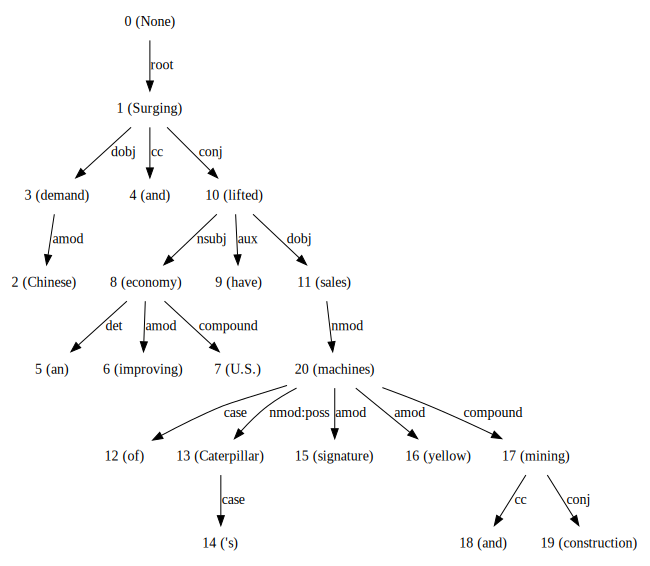

In [10]:
result = list(sdp.raw_parse(text))
dep_tree_dot_repr = [parse for parse in result][0].to_dot()
Source(dep_tree_dot_repr)